In [ ]:
! pip install transformers
! pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build whee

In [ ]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
device = torch.device("cuda")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/cyberbullying_tweets.csv',engine='python')
print(df.shape)

(47692, 2)


**Exploratry Data Analysis**

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
print(df.shape)

(47692, 2)


In [ ]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
df['cyberbullying'] = df.loc[:, 'cyberbullying_type']

In [ ]:
df.head()

,tweet_text,cyberbullying_type,cyberbullying
0,"In other words #katandandre, your food was cra...",not_cyberbullying,not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,not_cyberbullying


In [ ]:
df['cyberbullying'] = df['cyberbullying'].map(
                   {'religion':1 ,'age':1,'gender':1,'ethnicity':1,'other_cyberbullying':1,'not_cyberbullying':0})

In [ ]:
df.head()

,tweet_text,cyberbullying_type,cyberbullying
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0


In [ ]:
df['cyberbullying'].value_counts()

1    39747
0     7945
Name: cyberbullying, dtype: int64

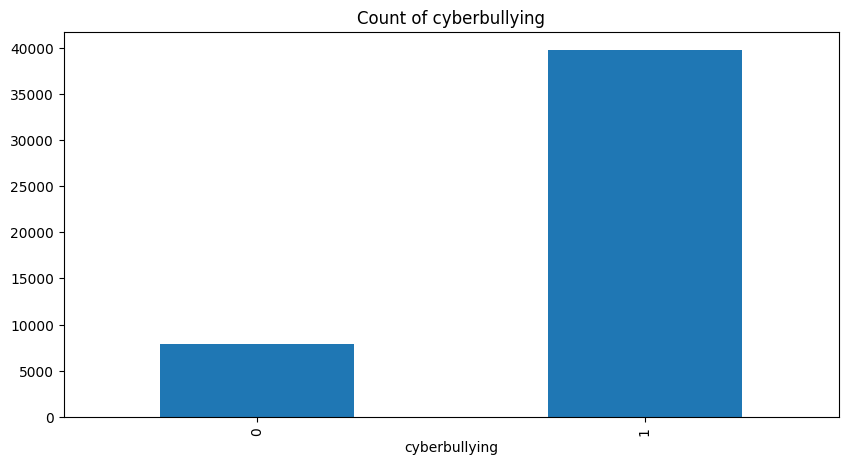

In [ ]:
ax= df['cyberbullying'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of cyberbullying',
          figsize=(10,5))
ax.set_xlabel('cyberbullying')
plt.show()

([<matplotlib.patches.Wedge at 0x7fcf487bfd30>,
 [Text(-0.9527607384216036, 0.5497699294453279, 'No Bullying'),
  Text(0.9527607126850149, -0.549769974047276, 'Bullying')],
 [Text(-0.5196876755026928, 0.2998745069701788, '83.34'),
  Text(0.5196876614645536, -0.29987453129851416, '16.66')])

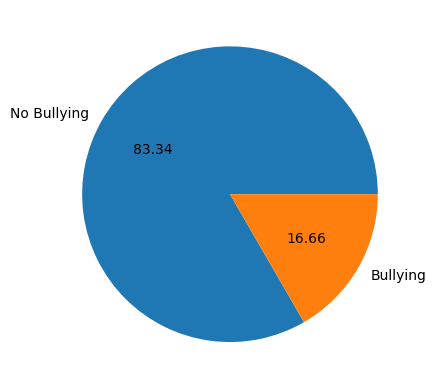

In [ ]:
label_size = [df['cyberbullying'].sum(),len(df['cyberbullying'])-df['cyberbullying'].sum()]
plt.pie(label_size,labels=['No Bullying','Bullying'],autopct='%.2f')

In [ ]:
X = df.drop(['cyberbullying'], axis=1)
Y = df['cyberbullying']

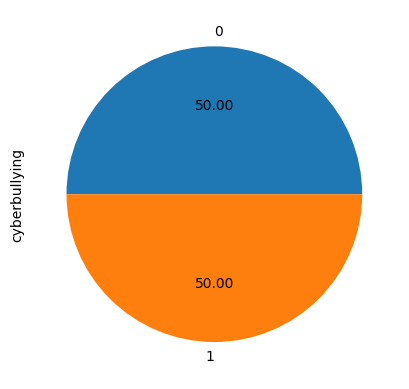

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1)
X_res, Y_res = rus.fit_resample(X, Y)
ax = Y_res.value_counts().plot.pie(autopct='%.2f')

In [ ]:
df=pd.concat([X_res,Y_res],axis=1)

In [ ]:
print(df.shape)

(15890, 3)


**Train Test Split**

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['tweet_text'], df['cyberbullying'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['cyberbullying'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'Number of texts')

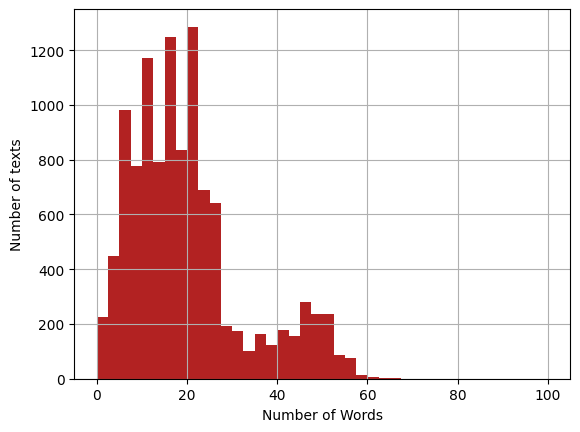

In [ ]:
seq_len = [len(tweet_text.split()) for tweet_text in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick', range=[0,100])
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [ ]:
MAX_LENGHT = 60
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

**Dataloader**

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32

train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

**Freeze Layers**

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

**Model Architecture**

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
      super(BERT_Arch, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.1)
      self.relu =  nn.ReLU()
      self.fc1 = nn.Linear(768,512)
      self.fc2 = nn.Linear(512,2)
      self.softmax = nn.LogSoftmax(dim=1)
    def forward(self, sent_id, mask):
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      x = self.softmax(x)
      return x

model = BERT_Arch(bert)
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)
cross_entropy  = nn.NLLLoss()
epochs =5

**Training and Validating**

In [ ]:
def train():
  model.train()
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]
    sent_id, mask, labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds=preds.detach().cpu().numpy()

  avg_loss = total_loss / len(train_dataloader)
  return avg_loss

def evaluate():
  print("\nEvaluating...")
  model.eval()
  total_loss, total_accuracy = 0, 0
  for step,batch in enumerate(val_dataloader):
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    batch = [t for t in batch]
    sent_id, mask, labels = batch
    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds,labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)
  return avg_loss

In [ ]:
best_valid_loss = float('inf')
train_losses=[]
valid_losses=[]

for epoch in range(epochs):
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    train_loss = train()
    valid_loss = evaluate()
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'checkpoint.pt')
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 5
  Batch    50  of    348.
  Batch   100  of    348.
  Batch   150  of    348.
  Batch   200  of    348.
  Batch   250  of    348.
  Batch   300  of    348.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.675
Validation Loss: 0.653

 Epoch 2 / 5
  Batch    50  of    348.
  Batch   100  of    348.
  Batch   150  of    348.
  Batch   200  of    348.
  Batch   250  of    348.
  Batch   300  of    348.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.648
Validation Loss: 0.628

 Epoch 3 / 5
  Batch    50  of    348.
  Batch   100  of    348.
  Batch   150  of    348.
  Batch   200  of    348.
  Batch   250  of    348.
  Batch   300  of    348.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.623
Validation Loss: 0.607

 Epoch 4 / 5
  Batch    50  of    348.
  Batch   100  of    348.
  Batch   150  of    348.
  Batch   200  of    348.
  Batch   250  of    348.
  Batch   300  of    348.

Evaluating...
  Batch    50  of     75.

Training Loss: 0.608

In [7]:
import shutil
shutil.copy("/content/checkpoint.pt", "/content/drive/MyDrive/Colab Notebooks/checkpoint.pt")

'/content/drive/MyDrive/Colab Notebooks/checkpoint.pt'

**Model Performance**

In [ ]:
path = '/content/checkpoint.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1192
           1       0.75      0.67      0.71      1192

    accuracy                           0.72      2384
   macro avg       0.73      0.72      0.72      2384
weighted avg       0.73      0.72      0.72      2384

